In [1]:
import os
import csv
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


In [2]:
class ImageGazeTracker:
    """A simple GUI application to track gaze points on an image."""

    def __init__(self, root):
        """Initialize the application with the main window root."""
        self.root = root
        self.image_label = tk.Label(root)
        self.image_label.pack()
        self.open_image_button = tk.Button(root, text="Open Image", command=self.open_and_track)
        self.open_image_button.pack()
        self.image_path = None
        self.coordinates_path = None

    def open_and_track(self):
        """Open an image file and prepare to track gaze point, then record gaze coordinates."""
        self.image_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg;*.bmp")])
        if not self.image_path:
            return
        
        self.coordinates_path = os.path.splitext(self.image_path)[0] + "-gaze_hmap.csv"
        self.track_gaze_point()

    def track_gaze_point(self):
        """Display the selected image in the GUI and bind mouse click event to record coordinates."""
        try:
            img = Image.open(self.image_path)
            img_tk = ImageTk.PhotoImage(img)
            self.image_label.config(image=img_tk)
            self.image_label.image = img_tk  # Keep a reference!
            self.image_label.bind("<Button-1>", self.record_coordinates)
        except Exception as e:
            print(f"Failed to open or display image: {e}")

    def record_coordinates(self, event):
        """Record the x, y coordinates of the mouse click on the image."""
        if self.coordinates_path:
            try:
                with open(self.coordinates_path, 'a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow([event.x, event.y])
                print(f"Recorded coordinates: ({event.x}, {event.y})")
            except Exception as e:
                print(f"Failed to write coordinates: {e}")
                

In [7]:
def generate_heatmap(img_path, coords_path):
    image = Image.open(img_path)
    data = np.zeros((image.height, image.width))
    with open(coords_path, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            x, y = map(int, row)
            if 0 <= x < image.width and 0 <= y < image.height:
                data[y, x] += 1
    data_smoothed = gaussian_filter(data, sigma=10)
    plt.imshow(image)
    plt.imshow(data_smoothed, alpha=0.5, cmap='jet')
    plt.axis('off')
    plt.show()
    # TODO: Save the heatmap image to a file
    heatmap_path = os.path.splitext(img_path)[0] + "-gaze_hmap.png"
    plt.savefig(heatmap_path, bbox_inches='tight', pad_inches=0)
    
def main():
    root = tk.Tk()
    app = ImageGazeTracker(root)
    root.mainloop()

    if app.image_path and app.coordinates_path:
        generate_heatmap(app.image_path, app.coordinates_path)
        

Recorded coordinates: (1895, 890)
Recorded coordinates: (2013, 875)
Recorded coordinates: (2057, 875)
Recorded coordinates: (1884, 911)
Recorded coordinates: (1922, 979)
Recorded coordinates: (2074, 972)
Recorded coordinates: (2021, 899)
Recorded coordinates: (1960, 992)
Recorded coordinates: (2036, 1026)
Recorded coordinates: (1971, 977)
Recorded coordinates: (1318, 591)
Recorded coordinates: (1326, 594)
Recorded coordinates: (1349, 596)


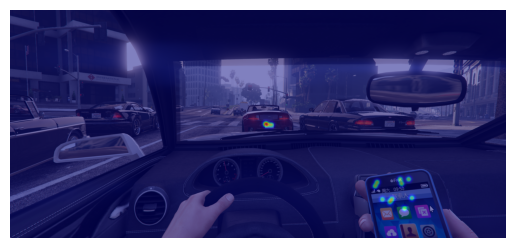

<Figure size 640x480 with 0 Axes>

In [8]:
main()